In [ ]:
## Upper Confidence Bound - Reinforcement Learning



# Agent will optimistically pick the action that has the highest upper bound i.e. A. 
# By doing this either it will have the highest value and get the highest reward, 
# or by taking that we will get to learn about an action we know least about.

# at each round - the number of times the ad was selected and the sum of rewards 

In [2]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [3]:
# Importing the dataset

# one row = one user

dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [4]:
# Implementing UCB algorithm

# initialization of variables

total_users = len(dataset.index) # number of users = number of rows = rounds
no_of_ads = len(dataset.columns)
total_reward = 0
sums_of_rewards = [0] * no_of_ads # the sum of rewards of the ad i up to round n - for each of the ads -> list
ads_selected = [] # list of ads selected over one round - the no of times the ad i was selected up to round n
numbers_of_selections = [0] * no_of_ads # number of times each ad was selected for each of the ads -> list


ad = 0 # selected ad in the round
for i in range(0,total_users):
    max_ucb = 0
    for j in range(0,no_of_ads):
        if (numbers_of_selections[j] > 0):
            avg_reward_ad = sums_of_rewards[j]/numbers_of_selections[j] # avg reward of ad i up to round n
            avg_confidence = math.sqrt(3/2 * math.log(i + 1)/numbers_of_selections[j]) # avg confidence interval at round n
            ucb = avg_reward_ad + avg_confidence
        else:
            ucb = 1e400 # if the ad was not selected yet, it will get selected because of the high value, only for the first 10 rounds
        if (ucb > max_ucb):
            max_ucb = ucb
            ad = j # select the ad
    ads_selected.append(ad) # ads selected over one round -> in the outer loop
    numbers_of_selections[ad] += 1
    reward = dataset.values[i, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward += reward

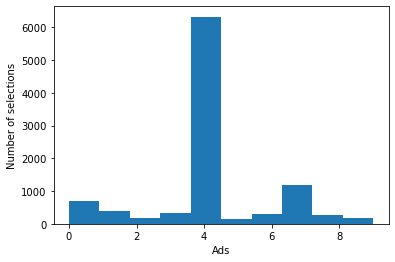

In [6]:
# Visualizing the results
plt.hist(ads_selected)
plt.xlabel("Ads")
plt.ylabel("Number of selections")
plt.show()